# 問題１〜５の回答は、下部にあるScratchSimpleNeuralNetrowkClassifier()クラスに記入。

# データセットをダウンロード

In [1]:
from keras.datasets import mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

Using TensorFlow backend.
/Users/takahashihideyuki/.pyenv/versions/anaconda3-2019.10/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/Users/takahashihideyuki/.pyenv/versions/anaconda3-2019.10/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/Users/takahashihideyuki/.pyenv/versions/anaconda3-2019.10/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.

# データセットの確認

In [2]:
print(X_train.shape) # (60000, 28, 28)
print(X_test.shape) # (10000, 28, 28)
print(X_train[0].dtype) # uint8
print(X_train[0])

(60000, 28, 28)
(10000, 28, 28)
uint8
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0 

# 平滑化
(1, 28, 28)の各画像を、(1, 784)に変換します。これまで学んできた機械学習手法や、今回扱う全結合層のみのニューラルネットワークではこの形で扱います。全てのピクセルが一列になっていることを、 平滑化（flatten） してあるという風に表現します。

In [3]:
X_train = X_train.reshape(-1, 784)
X_test = X_test.reshape(-1, 784)
print(X_train.shape)
print(X_test.shape)

(60000, 784)
(10000, 784)


# 画像データの可視化
画像データを可視化します。plt.imshowに渡します。

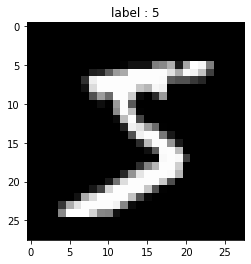

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline
index = 0
image = X_train[index].reshape(28,28)
# X_train[index]: (784,)
# image: (28, 28)
plt.imshow(image, 'gray')
plt.title('label : {}'.format(y_train[index]))
plt.show()

### 《発展的話題》
画像データは符号なし8ビット整数のuint8型で保持されることが一般的ですが、plt.imshowはより自由な配列を画像として表示することが可能です。例えば、以下のようにマイナスの値を持ったfloat64型の浮動小数点であってもエラーにはならないし、先ほどと全く同じ風に表示されます。



In [5]:
import numpy as np

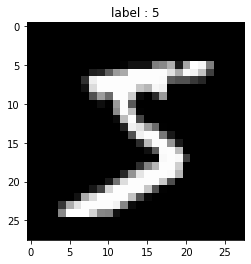

[[-105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35]
 [-105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35]
 [-105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35]
 [-105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35]
 [-105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -1

In [6]:
index = 0
image = X_train[index].reshape(28,28)
image = image.astype(np.float) # float型に変換
image -= 105.35 # 意図的に負の小数値を作り出してみる
plt.imshow(image, 'gray')
plt.title('label : {}'.format(y_train[index]))
plt.show()
print(image) # 値を確認

これは、自動的に値を0〜255の整数に変換して処理するように作られているからです。uint8型であっても最小値が0、最大値が255でない場合には色合いがおかしくなります。それを防ぐためには次のように引数を入れてください。

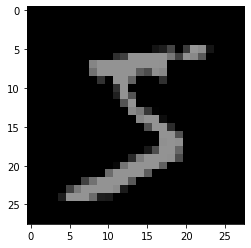

In [7]:
plt.imshow(image, 'gray', vmin = 0, vmax = 255)

画像関係のライブラリではこの自動的なスケーリングが思わぬ結果を生むことがあるので、新しいメソッドを使うときには確認しておきましょう。

# 前処理
画像は0から255のuint8型で表されますが、機械学習をする上では0から1のfloat型で扱うことになります。以下のコードで変換可能です。

In [8]:
X_train = X_train.astype(np.float)
X_test = X_test.astype(np.float)
X_train /= 255
X_test /= 255
print(X_train.max()) # 1.0
print(X_train.min()) # 0.0

1.0
0.0


また、正解ラベルは0から9の整数ですが、ニューラルネットワークで多クラス分類を行う際には one-hot表現 に変換します。scikit-learnのOneHotEncoderを使用したコードが以下です。このone-hot表現による値はそのラベルである確率を示していることになるため、float型で扱います。

In [9]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(handle_unknown='ignore', sparse=False)
y_train_one_hot = enc.fit_transform(y_train[:, np.newaxis])
y_test_one_hot = enc.transform(y_test[:, np.newaxis])
print(y_train.shape) # (60000,)
print(y_train_one_hot.shape) # (60000, 10)
print(y_train_one_hot.dtype) # float64

(60000,)
(60000, 10)
float64


In [10]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [11]:
y_train_one_hot[0:10]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]])

さらに、訓練データ6万枚の内2割を検証データとして分割してください。訓練データが48000枚、検証データが12000枚となります。

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2)
print(X_train.shape) # (48000, 784)
print(X_val.shape) # (12000, 784)

(48000, 784)
(12000, 784)


In [13]:
y_train_one_hot = enc.fit_transform(y_train[:, np.newaxis])
y_val_one_hot = enc.fit_transform(y_val[:, np.newaxis])
print(y_train_one_hot.shape)
print(y_val_one_hot.shape)

(48000, 10)
(12000, 10)


# ミニバッチ処理
これまでの機械学習スクラッチでは、全てのサンプルを一度に計算していました。しかし、ニューラルネットワークではデータを分割して入力する 確率的勾配降下法 が一般的です。分割した際のひとかたまりを ミニバッチ 、そのサンプル数を バッチサイズ と呼びます。


今回はバッチサイズを20とします。今回使う訓練データは48000枚ですから、48000÷20で2400回の更新を繰り返すことになります。ニューラルネットワークではこれを2400回 イテレーション（iteration） すると呼びます。訓練データを一度全て見ると1回の エポック（epoch） が終わったことになります。このエポックを複数回繰り返し、学習が完了します。


これを実現するための簡素なイテレータを用意しました。for文で呼び出すと、ミニバッチを取得できます

In [14]:
class GetMiniBatch:
    """
    ミニバッチを取得するイテレータ

    Parameters
    ----------
    X : 次の形のndarray, shape (n_samples, n_features)
      訓練データ
    y : 次の形のndarray, shape (n_samples, 1)
      正解値
    batch_size : int
      バッチサイズ
    seed : int
      NumPyの乱数のシード
    """
    def __init__(self, X, y, batch_size = 20, seed=0):
        self.batch_size = batch_size
        np.random.seed(seed)
        shuffle_index = np.random.permutation(np.arange(X.shape[0]))
        self._X = X[shuffle_index]
        self._y = y[shuffle_index]
        self._stop = np.ceil(X.shape[0]/self.batch_size).astype(np.int)
    def __len__(self):
        return self._stop
    def __getitem__(self,item):
        p0 = item*self.batch_size
        p1 = item*self.batch_size + self.batch_size
        return self._X[p0:p1], self._y[p0:p1]        
    def __iter__(self):
        self._counter = 0
        return self
    def __next__(self):
        if self._counter >= self._stop:
            raise StopIteration()
        p0 = self._counter*self.batch_size
        p1 = self._counter*self.batch_size + self.batch_size
        self._counter += 1
        return self._X[p0:p1], self._y[p0:p1]

このクラスをインスタンス化し、for文を使うことでミニバッチが取り出せます。

In [15]:
get_mini_batch = GetMiniBatch(X_train, y_train, batch_size=20)
print(len(get_mini_batch)) # 2400
print(get_mini_batch[5]) # 5番目のミニバッチが取得できる
for mini_X_train, mini_y_train in get_mini_batch:
    # このfor文内でミニバッチが使える
    pass

2400
(array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]]), array([9, 6, 3, 3, 0, 7, 1, 2, 3, 9, 0, 9, 3, 1, 7, 8, 7, 2, 3, 5],
      dtype=uint8))


__getitem__や__next__は__init__と同じ特殊メソッドの一種です。

# 学習
ニューラルネットワークの学習はフォワードプロパゲーションとバックプロパゲションの繰り返しになります。

# 【問題1】重みの初期値を決めるコードの作成
ニューラルネットワークの各層の重みの初期値を決めるコードを作成してください。


重みの初期値は様々な方法が提案されていますが、今回はガウス分布による単純な初期化を行います。バイアスに関しても同様です。


以下のコードを参考にしてください。標準偏差の値sigmaはハイパーパラメータです。発展的な重みの初期化方法については次のSprintで扱います。

In [16]:
n_features = 784
n_nodes1 = 400
sigma = 0.01 # ガウス分布の標準偏差
W1 = sigma * np.random.randn(n_features, n_nodes1)
# W1: (784, 400)
W1

array([[ 0.00792546, -0.00145092, -0.01287133, ..., -0.00245453,
        -0.03460641,  0.00758269],
       [-0.00137276,  0.00278289,  0.00932826, ..., -0.01495581,
         0.00968798,  0.0101332 ],
       [-0.00746748,  0.00905245,  0.0006038 , ...,  0.01249155,
        -0.00529285,  0.00730488],
       ...,
       [-0.00811823,  0.01002275, -0.00182602, ...,  0.00378093,
         0.02126478, -0.01424466],
       [-0.00437306, -0.00940798, -0.00387237, ..., -0.01876301,
         0.00512501, -0.00062903],
       [ 0.00909606,  0.00415442, -0.00521814, ...,  0.01918723,
        -0.00667915,  0.00316757]])

<function matplotlib.pyplot.show(*args, **kw)>

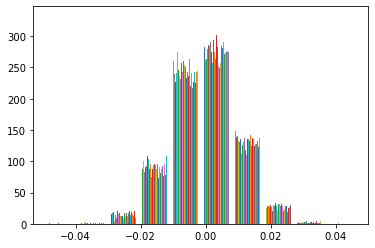

In [17]:
plt.hist(W1)
plt.show

# 【問題2】フォワードプロパゲーションの実装
三層のニューラルネットワークの フォワードプロパゲーション を作成してください。以下の説明ではノード数は1層目は400、2層目は200としますが、変更しても構いません。


各層の数式を以下に示します。今回はそれぞれの記号が表す配列が、実装上どのようなndarrayのshapeになるかを併記してあります。



batch_size = 20 # バッチサイズ<br>
n_features = 784 # 特徴量の数<br>
n_nodes1 = 400 # 1層目のノード数<br>
n_nodes2 = 200 # 2層目のノード数<br>
n_output = 10 # 出力のクラス数（3層目のノード数）<br>

#### 「1層目」


$A_1 = X \cdot W_1 + B_1$

$X$ : 特徴量ベクトル (batch_size, n_features)


$W_1$ : 1層目の重み (n_features, n_nodes1)


$B_1$ : 1層目のバイアス (n_nodes1,)


$A_1$ : 出力 (batch_size, n_nodes1)


#### 「1層目の活性化関数」


$Z_1 = f(A_1)$

$f()$ : 活性化関数


$Z_1$ 出力 (batch_size, n_nodes1)


#### 「2層目」


$A_2 = Z_1 \cdot W_2 + B_2$

$W_2$ : 2層目の重み (n_nodes1, n_nodes2)


$B_2$ : 2層目のバイアス (n_nodes2,)


$A_2$ : 出力 (batch_size, n_nodes2)


#### 「2層目の活性化関数」


$Z_2 = f(A_2)$

$f()$ : 活性化関数


$Z_2$ 出力 (batch_size, n_nodes2)


#### 「3層目（出力層）」


$A_3 = Z_2 \cdot W_3 + B_3$

$W_3$ : 3層目の重み (n_nodes2, n_output)


$B_3$ : 3層目のバイアス (n_output,)


$A_3$ : 出力 (batch_size, n_output)


#### 「3層目の活性化関数」


$Z_3 = softmax(A_3)$

$softmax()$ : ソフトマックス関数


$Z_3$ 出力 (batch_size, n_output)


$Z_3$ は各ラベル（0〜9）に対する確率の配列である。

# 活性化関数（フォワードプロバゲーション）
活性化関数を作成し、フォワードプロパゲーションの中で使用します。切り替えられるように実装することを推奨しますが、片方でも構いません。


#### 「シグモイド関数」


$f(Z) = sigmoid(A) = \frac{1}{1+exp(-A)}$

指数関数 $exp(-A)$ の計算はnp.expを使用してください。


numpy.exp — NumPy v1.15 Manual



#### 「ハイパボリックタンジェント関数」


次の数式で表されますが、np.tanhひとつで実現できます。


$f(Z) = tanh(A) = \frac{exp(A) - exp(-A)}{exp(A) + exp(-A)}$

numpy.tanh — NumPy v1.15 Manual


＊現在ではこれらの代わりにReLUと呼ばれる活性化関数が一般的です。次のSprintで扱います。

# ソフトマックス関数
ソフトマックス関数を作成し、フォワードプロパゲーションの中で使用します。これも活性化関数の一種ですが、多クラス分類の出力層で使われる特性上、区別して扱われることが多いです。


次の数式です。


$Z_{3\_k} = \frac{exp(A_{3\_k})}{\sum_{i=1}^{n_c}exp(A_{3\_i})}$

$Z_{3_k}$ : $k$ 番目のクラスの確率ベクトル (batch_size,)


$A_{3_k}$ : $k$ 番目のクラスにあたる前の層からのベクトル (batch_size,)


$n_c$ : クラスの数、n_output。今回のMNISTでは10。


分母は全てのクラスに相当する値を指数関数に通した上で足し合わせたものです。その中で、分子に $k$ 番目のクラスを持ってくることで、 $k$ 番目のクラスである確率が求まります。


これを10クラス分計算し、合わせたものが $Z_3$ です。

# 【問題3】交差エントロピー誤差の実装
目的関数（損失関数）を作成します。


多クラス分類の目的関数である交差エントロピー誤差 $L$ は次の数式です。


$L = - \frac{1}{n_b}\sum_{j}^{n_b}\sum_{k}^{n_c}y_{jk} log(z_{3\_jk})$

$y_{ij}$ : $j$ 番目のサンプルの $k$ 番目のクラスの正解ラベル（one-hot表現で0か1のスカラー）


$z_{3_ij}$ : $j$ 番目のサンプルの $k$ 番目のクラスの確率（スカラー）


$n_{b}$ : バッチサイズ、batch_size


$n_{c}$ : クラスの数、n_output（今回のMNISTでは10）


サンプル1つあたりの誤差が求まります。

# 【問題4】バックプロパゲーションの実装
三層のニューラルネットワークのバックプロパゲーションを作成してください。確率的勾配降下法を行う部分です。

数式を以下に示します。

まず、i層目の重みとバイアスの更新式です。 $W_i$ と $B_i$ に対し、更新後の $W_i^{\prime}$ と $B_i^{\prime}$ は次の数式で求められます。


$W_i^{\prime} = W_i - \alpha \frac{\partial L}{\partial W_i} \\
B_i^{\prime} = B_i - \alpha \frac{\partial L}{\partial B_i}$


$\alpha$ : 学習率（層ごとに変えることも可能だが、基本的には全て同じとする）


$\frac{\partial L}{\partial W_i}$ : $W_i$ に関する損失 $L$ の勾配


$\frac{\partial L}{\partial B_i}$ : $B_i$ に関する損失 $L$ の勾配


＊この勾配はミニバッチのサンプル数分の合計または平均を考えます。ここでは合計を計算します。

この更新方法はSprint3線形回帰やsprint4ロジスティック回帰における最急降下法と同様です。より効果的な更新方法が知られており、それは次のSprintで扱います。


勾配 $\frac{\partial L}{\partial W_i}$ や $\frac{\partial L}{\partial B_i}$ を求めるために、バックプロパゲーションを行います。以下の数式です。ハイパボリックタンジェント関数を使用した例を載せました。シグモイド関数の場合の数式はその後ろにあります。


### 「3層目」


$\frac{\partial L}{\partial A_3} = Z_{3} - Y\\
\frac{\partial L}{\partial B_3} = \sum_{j}^{n_b}\frac{\partial L}{\partial A_{3\_j}}\\
\frac{\partial L}{\partial W_3} = Z_{2}^{T}\cdot \frac{\partial L}{\partial A_3}\\
\frac{\partial L}{\partial Z_2} = \frac{\partial L}{\partial A_3} \cdot W_3^T $

$\frac{\partial L}{\partial A_3}$ : $A_3$ に関する損失 $L$ の勾配 (batch_size, n_output)


$\frac{\partial L}{\partial A_{3_j}}$ : j番目のサンプルの$A_3$ に関する損失 $L$ の勾配 (n_nodes2,)


$\frac{\partial L}{\partial B_3}$ : $B_3$ に関する損失 $L$ の勾配 (n_output,)


$\frac{\partial L}{\partial W_3}$ : $W_3$ に関する損失 $L$ の勾配 (n_nodes2, n_output)


$\frac{\partial L}{\partial Z_2}$ : $Z_2$ に関する損失 $L$ の勾配 (batch_size, n_nodes2)


$Z_{3}$ : ソフトマックス関数の出力 (batch_size, n_nodes2)


$Y$ : 正解ラベル (batch_size, n_output)


$Z_{2}$ : 2層目の活性化関数の出力 (batch_size, n_nodes2)


$W_3$ : 3層目の重み (n_nodes2, n_output)

### 「2層目」


$\frac{\partial L}{\partial A_2} = \frac{\partial L}{\partial Z_2} \odot \{1-tanh^2(A_{2})\}\\
\frac{\partial L}{\partial B_2} = \sum_{j}^{n_b}\frac{\partial L}{\partial A_{2\_j}}\\
\frac{\partial L}{\partial W_2} = Z_{1}^T \cdot \frac{\partial L}{\partial A_2}\\
\frac{\partial L}{\partial Z_1} = \frac{\partial L}{\partial A_2} \cdot W_2^T $

$\frac{\partial L}{\partial A_2}$ : $A_2$ に関する損失 $L$ の勾配 (batch_size, n_nodes2)


$\frac{\partial L}{\partial A_{2_j}}$ : j番目のサンプルの$A_2$ に関する損失 $L$ の勾配 (n_nodes2,)


$\frac{\partial L}{\partial B_2}$ : $B_2$ に関する損失 $L$ の勾配 (n_output,)


$\frac{\partial L}{\partial W_2}$ : $W_2$ に関する損失 $L$ の勾配 (n_nodes1, n_nodes2)


$\frac{\partial L}{\partial Z_2}$ : $Z_2$ に関する損失 $L$ の勾配 (batch_size, n_nodes2)


$A_2$ : 2層目の出力 (batch_size, n_nodes2)


$Z_{1}$ : 1層目の活性化関数の出力 (batch_size, n_nodes1)


$W_2$ : 2層目の重み (n_nodes1, n_nodes2)


### 「1層目」


$\frac{\partial L}{\partial A_1} = \frac{\partial L}{\partial Z_1} \odot \{1-tanh^2(A_{1})\}\\
\frac{\partial L}{\partial B_1} = \sum_{j}^{n_b}\frac{\partial L}{\partial A_{1\_j}}\\
\frac{\partial L}{\partial W_1} = X^T \cdot \frac{\partial L}{\partial A_1}\\ $

$\frac{\partial L}{\partial A_1}$ : $A_1$ に関する損失 $L$ の勾配 (batch_size, n_nodes1)


$\frac{\partial L}{\partial A_{1_j}}$ : j番目のサンプルの$A_1$ に関する損失 $L$ の勾配 (n_nodes1,)


$\frac{\partial L}{\partial B_1}$ : $B_1$ に関する損失 $L$ の勾配 (n_output,)


$\frac{\partial L}{\partial W_1}$ : $W_1$ に関する損失 $L$ の勾配 (n_features, n_nodes1)


$\frac{\partial L}{\partial Z_1}$ : $Z_1$ に関する損失 $L$ の勾配 (batch_size, n_nodes1)


$A_1$ : 1層目の出力 (batch_size, n_nodes1)


$X$ : 特徴量ベクトル (batch_size, n_features)


$W_1$ : 1層目の重み (n_features, n_nodes1)


《補足》


活性化関数にシグモイド関数を使用した場合は、次のようになります。


$\frac{\partial L}{\partial A_2} = \frac{\partial L}{\partial Z_2} \odot  \{1-sigmoid(A_{2})\}sigmoid(A_{2})
\\
\frac{\partial L}{\partial A_1} = \frac{\partial L}{\partial Z_1} \odot  \{1-sigmoid(A_{1})\}sigmoid(A_{1})$


# 【問題5】推定
推定を行うメソッドを作成してください。

フォワードプロパゲーションによって出力された10個の確率の中で、最も高いものはどれかを判定します。

In [18]:
class ScratchSimpleNeuralNetrowkClassifier():
    """
    シンプルな三層ニューラルネットワーク分類器

    Parameters
    ----------

    Attributes
    ----------
    """
    def __init__(self, sigma=0.01, batch_size=20, activation_func="tanh", 
                           n_nodes1=400, n_nodes2=200, n_layer=3, lr=10**-2, n_epoch=15, verbose = False):
        self.sigma = sigma #ガウス分布の標準偏差
        self.batch_size = batch_size #バッチサイズ
        self.activation_func = activation_func #活性化関数の種類
        self.n_nodes1 = n_nodes1 # 1層目のノード数
        self.n_nodes2 = n_nodes2 # 2層目のノード数
        self.n_layer = n_layer #層の数
        self.lr = lr #学習率
        self.n_epoch =n_epoch #エポック数
        self.verbose = verbose
        pass
    
    def fit(self, X_train, y_train, X_val=None, y_val=None):
        """
        ニューラルネットワーク分類器を学習する。

        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            訓練データの特徴量
        y : 次の形のndarray, shape (n_samples, )
            訓練データの正解値
        X_val : 次の形のndarray, shape (n_samples, n_features)
            検証データの特徴量
        y_val : 次の形のndarray, shape (n_samples, )
            検証データの正解値
        """
        
        self.n_output = len((y_train[0])) #クラスの数をインスタンス変数化      
        get_mini_batch = GetMiniBatch(X_train, y_train, self.batch_size) #GetMiniBatchクラスでミニバッチを作成
        get_mini_batch_val = GetMiniBatch(X_val, y_val, self.batch_size) #GetMiniBatchクラスでミニバッチを作成
        
        loss_list_epoch = [] # 損失を記録する空のリスト
        self.loss_list = loss_list_epoch #損失を記録したリストをインスタンス変数化
        loss_list_epoch_val = [] # 損失を記録する空のリスト(検証データ用)
        self.loss_list_val = loss_list_epoch_val #損失を記録したリストをインスタンス変数化(検証データ用)
        
        n_iter = 0
        
        #検証データの処理
        for i in range(self.n_epoch):    
            loss_list_val = []
            for mini_X_train, mini_y_train in get_mini_batch_val:
                # このfor文内でミニバッチが使える
                n_iter += 1
                self.n_iter = n_iter
                
                W1, b1, A1, Z1, W2, b2, A2, Z2, W3, b3, A3, Z3 = self.forward_propa(mini_X_train)
                W1, b1, W2, b2, W3, b3 = self.back_propa(mini_X_train, mini_y_train, W1, b1, A1, Z1, W2, b2, A2, Z2, W3, b3, A3, Z3)
                self.W1 = W1
                self.b1 = b1
                self.W2 = W2
                self.b2 = b2
                self.W3 = W3
                self.b3 = b3

                loss = self.loss(Z3, mini_y_train)
                loss_list_val.append(loss)
                
            loss_list_epoch_val.append(sum(loss_list_val))
        
        #学習データの処理
        for i in range(self.n_epoch):
            loss_list = []
            for mini_X_train, mini_y_train in get_mini_batch:
                # このfor文内でミニバッチが使える
                n_iter += 1
                self.n_iter = n_iter
                
                W1, b1, A1, Z1, W2, b2, A2, Z2, W3, b3, A3, Z3 = self.forward_propa(mini_X_train)
                W1, b1, W2, b2, W3, b3 = self.back_propa(mini_X_train, mini_y_train, W1, b1, A1, Z1, W2, b2, A2, Z2, W3, b3, A3, Z3)
                self.W1 = W1
                self.b1 = b1
                self.W2 = W2
                self.b2 = b2
                self.W3 = W3
                self.b3 = b3

                loss = self.loss(Z3, mini_y_train)
                loss_list.append(loss)
                
            loss_list_epoch.append(sum(loss_list))    
    
        if self.verbose:
            #verboseをTrueにした際は学習過程などを出力する
            print(loss_list)
            print(loss_list_val)
    
    #【問題2】フォワードプロパゲーションの実装
    def forward_propa(self, mini_X_train):
        
        #1層目の処理
        if self.n_iter == 1:
            W1, b1 = self.init_Wb(mini_X_train, layer=1) #init_Wb関数で層の重み・バイアスを算出
        else:
            W1 = self.W1
            b1 = self.b1
        
        A1 = (mini_X_train @ W1) + b1 #出力サイズ(batch_size, n_nodes or n_output)
        Z1 = self.activation(A1) #活性化関数の出力(batch_size, n_nodes)
        
        #2層目の処理
        if self.n_iter == 1:
            W2, b2 = self.init_Wb(Z1, layer=2) #init_Wb関数で層の重み・バイアスを算出
        else:
            W2 = self.W2
            b2 = self.b2
            
        A2 = (Z1 @ W2) + b2 #出力サイズ(batch_size, n_nodes or n_output)
        Z2 = self.activation(A2) #活性化関数の出力(batch_size, n_nodes)
        
        #3層目の処理
        if self.n_iter == 1:
            W3, b3 = self.init_Wb(Z2, layer=3) #init_Wb関数で層の重み・バイアスを算出
        else:
            W3 = self.W3
            b3 = self.b3

        A3 = (Z2 @ W3) + b3 #出力サイズ(batch_size, n_nodes or n_output)
        Z3 = self.softmax(A3) #ソフトマックス関数の出力(batch_size, n_output)
        
        return W1, b1, A1, Z1, W2, b2, A2, Z2, W3, b3, A3, Z3
        
    #【問題1】重みの初期値を決めるコードの作成
    def init_Wb(self, X, layer=1):
        if layer == 1:
            n_nodes = self.n_nodes1
        elif layer == 2:
            n_nodes = self.n_nodes2
        elif layer == 3:
            n_nodes = self.n_output
        
        np.random.seed(123)
        W = self.sigma * np.random.randn(X.shape[1], n_nodes) #重みの初期値
        b = self.sigma * np.random.randn(n_nodes) #バイアスの初期値
        
        return W, b
    
    #活性化関数
    def activation(self, A):
   
        if self.activation_func == "tanh":
            activation = np.tanh(A) #ハイパボリックタンジェント関数   
            
        elif self.activation_func == "sigmoid":
            activation = 1 / (1 + np.exp(-A)) #シグモイド関数
            
        return activation
     
    #ソフトマックス関数
    def softmax(self, A):
        A = A - np.max(A, axis=1, keepdims=True) #オーバーフロー対策
        Z = np.exp(A) / np.sum(np.exp(A), axis=1, keepdims=True)
        return Z
    
    #【問題3】交差エントロピー誤差の実装
    def loss(self, Z, mini_y_train):
        loss = -1 * np.sum(mini_y_train * np.log(Z + 1e-7)) / self.batch_size
        return loss
    
    #【問題4】バックプロパゲーションの実装
    def back_propa(self, mini_X_train, mini_y_train, W1, b1, A1, Z1, W2, b2, A2, Z2, W3, b3, A3, Z3):

        #３層目の処理
        A3_loss_grad = Z3 -  mini_y_train #A3に関する損失の勾配
        b3_loss_grad = np.sum(A3_loss_grad, axis=0) #b3バイアスに関する損失の勾配
        W3_loss_grad = Z2.T @ A3_loss_grad #W3重みに関する損失の勾配
        Z2_loss_grad = A3_loss_grad @ W3.T #Z2に関する損失の勾配

        #バイアスの更新  
        b3 = b3 - (self.lr * b3_loss_grad)
        #重みの更新
        W3 = W3 - (self.lr * W3_loss_grad) 

 
        #２層目の処理
        if self.activation_func == "tanh":
            A2_loss_grad = Z2_loss_grad * (1 - np.tanh(A2)**2) #A2に関する損失の勾配
        elif self.activation_func == "sigmoid":
            A2_loss_grad = Z2_loss_grad * ((1 - (1 / (1 + np.exp(-A2)))) * (1 / (1 + np.exp(-A2))))
            
        b2_loss_grad = np.sum(A2_loss_grad, axis=0) #b2バイアスに関する損失の勾配
        W2_loss_grad = Z1.T @ A2_loss_grad #W2重みに関する損失の勾配
        Z1_loss_grad = A2_loss_grad @ W2.T #Z1に関する損失の勾配
        
        #バイアスの更新  
        b2 = b2 - (self.lr * b2_loss_grad)
        #重みの更新
        W2 = W2 - (self.lr * W2_loss_grad)
        
            
        #１層目の処理
        if self.activation_func == "tanh":
            A1_loss_grad = Z1_loss_grad * (1 - np.tanh(A1)**2) #A2に関する損失の勾配
        elif self.activation_func == "sigmoid":
            A1_loss_grad = Z1_loss_grad * ((1 - (1 / (1 + np.exp(-A1)))) * (1 / (1 + np.exp(-A1))))
            
        b1_loss_grad = np.sum(A1_loss_grad, axis=0) #b1バイアスに関する損失の勾配
        W1_loss_grad = mini_X_train.T @ A1_loss_grad #W1重みに関する損失の勾配 
        
        #バイアスの更新  
        b1 = b1 - (self.lr * b1_loss_grad)
        #重みの更新
        W1 = W1 - (self.lr * W1_loss_grad) 

        return  W1, b1, W2, b2, W3, b3
    
    #【問題5】推定
    def predict(self, X):
        """
        ニューラルネットワーク分類器を使い推定する。

        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            サンプル

        Returns
        -------
            次の形のndarray, shape (n_samples, 1)
            推定結果
        """
        
        W1, b1, A1, Z1, W2, b2, A2, Z2, W3, b3, A3, Z3 = self.forward_propa(X)
        
        pred = np.argmax(Z3, axis=1)

        return pred

# 【問題6】学習と推定
MNISTのデータを学習・推定し、Accuracyを計算してください。

In [19]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [20]:
ssnnc = ScratchSimpleNeuralNetrowkClassifier()
ssnnc.fit(X_train, y_train_one_hot, X_val, y_val_one_hot)

In [21]:
#検証データ
pred_val = ssnnc.predict(X_val)
print("正解率：{:.2f}".format(accuracy_score(y_val, pred_val)))
print("混同行列：")
print(confusion_matrix(y_val, pred_val))
print("classification_report：") #評価をまとめて出力するやつ
print(classification_report(y_val, pred_val))

正解率：0.99
混同行列：
[[1168    0    1    1    0    0    5    0    0    3]
 [   0 1315    3    1    0    1    0    0    1    0]
 [   1    1 1208    4    2    0    1    3    2    0]
 [   0    0    2 1202    0    3    0    3    5    1]
 [   0    2    1    0 1124    0    1    1    2    8]
 [   0    0    1    6    1 1102    5    0    1    2]
 [   1    0    0    0    1    1 1174    0    1    0]
 [   0    2    4    2    3    1    0 1262    1    3]
 [   0    0    2    1    0    4    2    0 1122    2]
 [   2    0    0    1    6    1    0    9    5 1193]]
classification_report：
              precision    recall  f1-score   support

           0       1.00      0.99      0.99      1178
           1       1.00      1.00      1.00      1321
           2       0.99      0.99      0.99      1222
           3       0.99      0.99      0.99      1216
           4       0.99      0.99      0.99      1139
           5       0.99      0.99      0.99      1118
           6       0.99      1.00      0.99      117

In [22]:
#テストデータ
pred = ssnnc.predict(X_test)
print("正解率：{:.2f}".format(accuracy_score(y_test, pred)))
print("混同行列：")
print(confusion_matrix(y_test, pred))
print("classification_report：") #評価をまとめて出力するやつ
print(classification_report(y_test, pred))

正解率：0.98
混同行列：
[[ 969    0    2    1    1    0    3    1    2    1]
 [   0 1123    2    2    0    1    2    1    4    0]
 [   5    0 1011    6    2    0    0    4    4    0]
 [   0    0    6  993    1    1    0    5    3    1]
 [   1    0    2    0  962    1    7    2    0    7]
 [   3    0    0   12    2  866    5    0    3    1]
 [   2    2    2    1    6    3  939    0    3    0]
 [   1    3    7    2    1    0    0 1007    1    6]
 [   3    1    2    3    4    3    3    4  948    3]
 [   2    2    0    2    6    4    2    9    2  980]]
classification_report：
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.98      0.98      1032
           3       0.97      0.98      0.98      1010
           4       0.98      0.98      0.98       982
           5       0.99      0.97      0.98       892
           6       0.98      0.98      0.98       95

# 【問題7】学習曲線のプロット
学習曲線をプロットしてください。

ニューラルネットワークは過学習が発生しやすいため、学習曲線の確認が重要です。訓練データと検証データに対するエポックごとの損失（交差エントロピー誤差）を記録できるようにする必要があります。

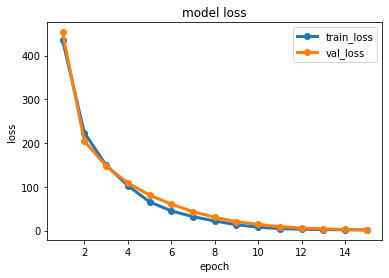

In [28]:
plt.title("model loss")
plt.xlabel("epoch")
plt.ylabel("loss")
plt.plot(np.arange(1, len(ssnnc.loss_list)+1), ssnnc.loss_list, label="train_loss", marker="o", linewidth=3)
plt.plot(np.arange(1, len(ssnnc.loss_list_val)+1), ssnnc.loss_list_val, label="val_loss", marker="o", linewidth=3)
plt.legend()
plt.show()

# 【問題8】（アドバンス課題）誤分類の確認
誤分類した画像はどのようなものだったかを確認してください。推定値を用意し、以下のコードを実行してください。

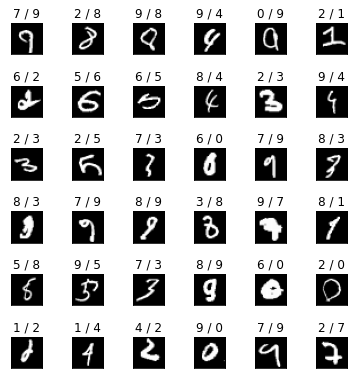

In [27]:
"""
語分類結果を並べて表示する。画像の上の表示は「推定結果/正解」である。

Parameters:
----------
y_pred : 推定値のndarray (n_samples,)
y_val : 検証データの正解ラベル(n_samples,)
X_val : 検証データの特徴量（n_samples, n_features)
"""
import numpy as np
import matplotlib.pyplot as plt
num = 36 # いくつ表示するか
true_false = pred_val==y_val
false_list = np.where(true_false==False)[0].astype(np.int)
if false_list.shape[0] < num:
    num = false_list.shape[0]
fig = plt.figure(figsize=(6, 6))
fig.subplots_adjust(left=0, right=0.8,  bottom=0, top=0.8, hspace=1, wspace=0.5)
for i in range(num):
    ax = fig.add_subplot(6, 6, i + 1, xticks=[], yticks=[])
    ax.set_title("{} / {}".format(pred_val[false_list[i]],y_val[false_list[i]]))
    ax.imshow(X_val.reshape(-1,28,28)[false_list[i]], cmap='gray')

#### 動きが重いver.

In [26]:
# class ScratchSimpleNeuralNetrowkClassifier():
#     """
#     シンプルな三層ニューラルネットワーク分類器

#     Parameters
#     ----------

#     Attributes
#     ----------
#     """
#     def __init__(self, sigma=0.01, batch_size=20, activation_func="tanh", 
#                            n_nodes1=400, n_nodes2=200, n_layer=3, lr=0.01, n_epoch=5, verbose = False):
#         self.sigma = sigma #ガウス分布の標準偏差
#         self.batch_size = batch_size #バッチサイズ
#         self.activation_func = activation_func #活性化関数の種類
#         self.n_nodes1 = n_nodes1 # 1層目のノード数
#         self.n_nodes2 = n_nodes2 # 2層目のノード数
#         self.n_layer = n_layer #層の数
#         self.lr = lr #学習率
#         self.n_epoch =n_epoch #エポック数
#         self.verbose = verbose
#         pass
    
#     def fit(self, X_train, y_train, X_val=None, y_val=None):
#         """
#         ニューラルネットワーク分類器を学習する。

#         Parameters
#         ----------
#         X : 次の形のndarray, shape (n_samples, n_features)
#             訓練データの特徴量
#         y : 次の形のndarray, shape (n_samples, )
#             訓練データの正解値
#         X_val : 次の形のndarray, shape (n_samples, n_features)
#             検証データの特徴量
#         y_val : 次の形のndarray, shape (n_samples, )
#             検証データの正解値
#         """
        
#         self.n_output = len((y_train[0])) #クラスの数をインスタンス変数化      
#         get_mini_batch = GetMiniBatch(X_train, y_train, self.batch_size) #GetMiniBatchクラスでミニバッチを作成
    
#         W_list_New = [] #重みを保持する空のリスト
#         self.W_list_New = W_list_New #更新された重みを格納したリストをインスタンス変数化
        
#         b_list_New = [] #バイアスを保持する空のリスト
#         self.b_list_New = b_list_New #更新されたバイアスを格納したリストをインスタンス変数化
        
#         loss_list = [] # 損失を記録する空のリスト
#         self.loss_list = loss_list #損失を記録したリストをインスタンス変数化
        
#         for i in range(self.n_epoch):
#             for mini_X_train, mini_y_train in get_mini_batch:
#                 # このfor文内でミニバッチが使える
#                 W_list, b_list, A_list, Z_list = self.forward_propa(mini_X_train)
#                 W_list_new, b_list_new = self.back_propa(mini_X_train, mini_y_train, W_list, b_list, A_list, Z_list, cnt=self.n_layer)
#                 W_list_New.append(W_list_new)
#                 b_list_New.append(b_list_new)

#                 loss = self.loss(Z_list[-1], mini_y_train)
#                 loss_list.append(loss)
      
#         if self.verbose:
#             #verboseをTrueにした際は学習過程などを出力する
#             print(loss_list)
    
#     #【問題2】フォワードプロパゲーションの実装
#     def forward_propa(self, mini_X_train, cnt=0, W_list=[], b_list=[], A_list=[], Z_list=[]):
#         cnt += 1
#         self.cnt = cnt

#         if len(self.W_list_New) == 0:
#             W, b = self.init_Wb(mini_X_train) #init_Wb関数で層の重み・バイアスを算出
#         else:
#             W = self.W_list_New[-1][cnt - 1]
#             b = self.b_list_New[-1][cnt - 1]
            
#         W_list.append(W)
#         b_list.append(b)    
       
#         A = (mini_X_train @ W) + b #出力サイズ(batch_size, n_nodes or n_output)
#         A_list.append(A)
        
#         if cnt == self.n_layer:
#             Z = self.softmax(A) #ソフトマックス関数の出力(batch_size, n_output)
#         else:
#             Z = self.activation(A) #活性化関数の出力(batch_size, n_nodes)
#         Z_list.append(Z)

#         if cnt == self.n_layer:
#             return W_list[-3:], b_list[-3:], A_list[-3:], Z_list[-3:]
        
#         return self.forward_propa(Z, cnt, W_list, b_list, A_list, Z_list)
        
#     #【問題1】重みの初期値を決めるコードの作成
#     def init_Wb(self, X):
#         if self.cnt == 1:
#             n_nodes = self.n_nodes1
#         elif self.cnt == 2:
#             n_nodes = self.n_nodes2
#         elif self.cnt == self.n_layer:
#             n_nodes = self.n_output
        
#         np.random.seed(123)
#         W = self.sigma * np.random.randn(X.shape[1], n_nodes) #重みの初期値
#         b = self.sigma * np.random.randn(n_nodes) #バイアスの初期値
        
#         return W, b
    
#     #活性化関数
#     def activation(self, A):
#         tanh = np.tanh(A) #ハイパボリックタンジェント関数
#         sigmoid = 1 / (1 + np.exp(-A)) #シグモイド関数
        
#         if self.activation_func == "tanh":
#             return tanh      
#         elif self.activation_func == "sigmoid":
#             return sigmoid
     
#     #ソフトマックス関数
#     def softmax(self, A):
#         A = A - np.max(A, axis=1, keepdims=True) #オーバーフロー対策
#         Z = np.exp(A) / np.sum(np.exp(A), axis=1, keepdims=True)
#         return Z
    
#     #【問題3】交差エントロピー誤差の実装
#     def loss(self, Z, mini_y_train):
#         loss = -1 * np.sum(mini_y_train * np.log(Z + 1e-7)) / self.batch_size
#         return loss
    
#     #【問題4】バックプロパゲーションの実装
#     def back_propa(self, mini_X_train, mini_y_train, W_list, b_list, A_list, Z_list, cnt, W_list_new=[], b_list_new=[]):
#         cnt -= 1
        
#         if cnt == self.n_layer -1: #３層目の処理
#             A_loss_grad = Z_list[cnt] -  mini_y_train #Aに関する損失の勾配
#             b_loss_grad = np.sum(A_loss_grad, axis=0) #バイアスに関する損失の勾配
#             W_loss_grad = Z_list[cnt - 1].T @ A_loss_grad #重みに関する損失の勾配
 
#         elif cnt == self.n_layer -2: #２層目の処理
#             A_loss_grad = mini_y_train * (1 - np.tanh(A_list[cnt])**2) #Aに関する損失の勾配
#             b_loss_grad = np.sum(A_loss_grad, axis=0) #バイアスに関する損失の勾配
#             W_loss_grad = Z_list[cnt - 1].T @ A_loss_grad #重みに関する損失の勾配
            
#         elif cnt == self.n_layer -3: #１層目の処理
#             A_loss_grad = mini_y_train * (1 - np.tanh(A_list[cnt])**2) #Aに関する損失の勾配
#             b_loss_grad = np.sum(A_loss_grad, axis=0) #バイアスに関する損失の勾配
#             W_loss_grad = mini_X_train.T @ A_loss_grad #重みに関する損失の勾配 
        
#         #バイアスの更新  
#         b_new = b_list[cnt] - (self.lr * b_loss_grad)
#         b_list_new.insert(0, b_new)
        
#         #重みの更新
#         W_new = W_list[cnt] - (self.lr * W_loss_grad)
#         W_list_new.insert(0, W_new)
        
#         if cnt == 0:
#             return W_list_new[:3], b_list_new[:3]
        
#         Z_loss_grad = A_loss_grad @ W_list[cnt].T #Zに関する損失の勾配

#         return self.back_propa(mini_X_train, Z_loss_grad, W_list, b_list, A_list, Z_list, cnt, W_list_new, b_list_new)
    
#     #【問題5】推定
#     def predict(self, X):
#         """
#         ニューラルネットワーク分類器を使い推定する。

#         Parameters
#         ----------
#         X : 次の形のndarray, shape (n_samples, n_features)
#             サンプル

#         Returns
#         -------
#             次の形のndarray, shape (n_samples, 1)
#             推定結果
#         """
        
#         W_list, b_list, A_list, Z_list = self.forward_propa(X)
        
#         pred = np.argmax(Z_list[-1], axis=1)

#         return pred